## Fetal Health Classifier
Predict **fetal health** given CTG measurements of the fetals measurements and knowledge about fetal health

| Name | Description |
|------|--------------|
| baseline value | Baseline Fetal Heart Rate (FHR) (beats per minute) |
| accelerations | # accelerations per second |
| fetal_movement | # fetal movements per second |
| uterine_contractions | # uterine contractions per second |
| light_decelerations | # light decelerations (LDs) per second |
| severe_decelerations | # severe decelerations (SDs) per second |
| prolongued_decelerations | # prolongued decelerations (PDs) per second |
| abnormal_short_term_variability | % time with abnormal short term variability |
| mean_value_of_short_term_variability | Mean value of short term variability |
| percentage_of_time_with_abnormal_long_term_variability | % time with abnormal long term variability |
| mean_value_of_long_term_variability | Mean value of long term variability |
| histogram_width | Width of histogram made using all values from a record |
| histogram_min | Histogram minimum value |
| histogram_max | Histogram maximum value |
| histogram_number_of_peaks | # peaks in the exam histogram |
| histogram_number_of_zeroes | # zeroes in the exam histogram |
| histogram_mode | Histogram mode |
| histogram_mean | Histogram mean |
| histogram_median | Histogram median |
| histogram_variance | Histogram variance |
| histogram_tendency | Histogram tendency |
| *fetal_health (target)* | Encoded as 1-Normal; 2-Suspect; 3-Pathological |

### Import Libraries

In [97]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package to implement Random Forest
from sklearn.ensemble import RandomForestClassifier

# Package to implement AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Voting classifier
from sklearn.ensemble import VotingClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

### Load Dataset

In [98]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [99]:
# Select input and output features
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

# Map to readable class names before splitting
class_map = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
y = y.map(class_map)

In [100]:
# Save the raw feature dataframe (before encoding)
X.to_csv("fetal_health_train_raw.csv", index=False)

In [101]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [102]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

## **Train and Evaluate Random Forest Regressor**

In [103]:
# Define model
rf = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, random_state = 0)

In [104]:
# Fit the model
start = time.time()            # Start Time
rf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.15871286392211914s


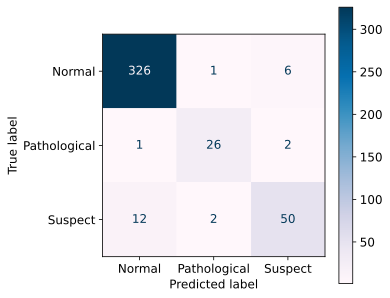

In [105]:
# Predict
rf_pred = rf.predict(test_X)
rf_proba  = rf.predict_proba(test_X)

# Evaluate
# Now generate confusion matrix
cm = confusion_matrix(test_y, rf_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
rf_f1  = f1_score(test_y, rf.predict(test_X),  average="macro")

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

# Saving confusion matrix plot
plt.savefig("rf_confusion_matrix.svg", bbox_inches = 'tight')

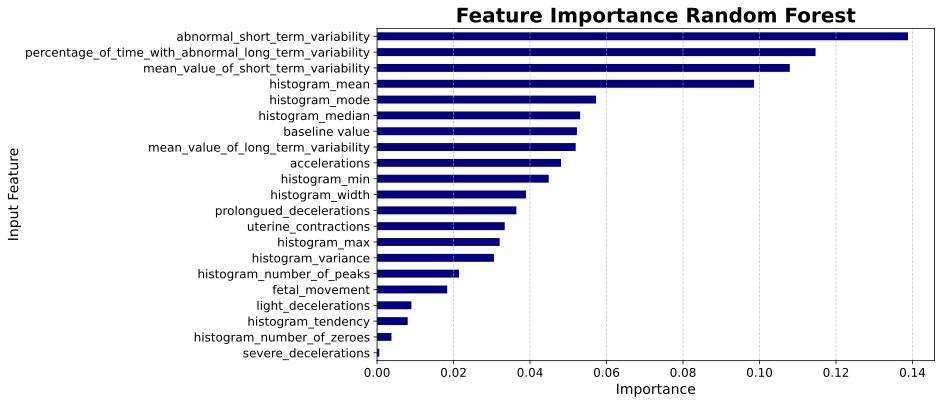

In [107]:
# Get feature importances
rf_imp = rf.feature_importances_
feature_names = train_X.columns

# Create a DataFrame for plotting
feat_importances_rf = pd.Series(rf_imp, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(10, 6))
feat_importances_rf.plot(kind='barh', color='navy')
plt.title("Feature Importance Random Forest", fontsize=20, weight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Input Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Saving Random Forest feature importance plot
plt.savefig("rf_feature_importance.svg", bbox_inches = 'tight')

In [108]:
# Classification report
rf_report = pd.DataFrame(classification_report(test_y, rf_pred, output_dict = True))
rf_report.to_csv("rf_classification_report.csv")

## **Train and Evaluate Decision tree**

In [109]:
# Define decision tree model
dt = sklearn.tree.DecisionTreeClassifier(random_state = 42)

In [110]:
# Fit the model
start = time.time()            # Start Time
dt.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.021681785583496094s


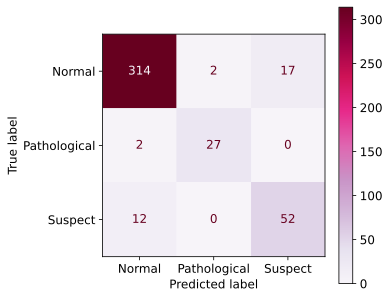

In [111]:
# Predict
dt_pred = dt.predict(test_X)
dt_proba  = dt.predict_proba(test_X)

# Evaluate
# Generate confusion matrix
cm = confusion_matrix(test_y, dt_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
dt_f1  = f1_score(test_y, dt.predict(test_X),  average="macro")


# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix in another colormap
disp.plot(cmap = 'PuRd', ax = ax);

# Saving confusion matrix plot
plt.savefig("dt_confusion_matrix.svg", bbox_inches = 'tight')

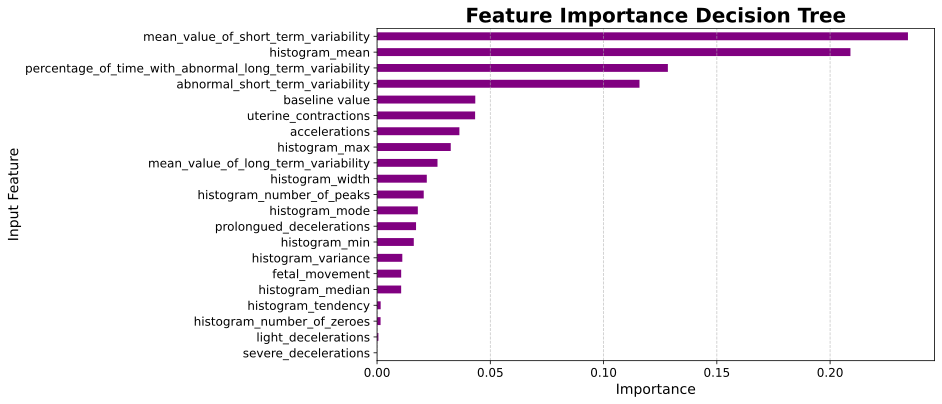

In [114]:
# Get feature importances
dt_imp = dt.feature_importances_
feature_names = train_X.columns

# Create a DataFrame for plotting
feat_importances_dt = pd.Series(dt_imp, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(10, 6))
feat_importances_dt.plot(kind='barh', color='purple')
plt.title("Feature Importance Decision Tree", fontsize=20, weight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Input Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Saving Decision Tree feature importance plot
plt.savefig("dt_feature_importance.svg", bbox_inches = 'tight')

In [115]:
# Classification report
dt_report = pd.DataFrame(classification_report(test_y, dt_pred, output_dict = True))
dt_report.to_csv("dt_classification_report.csv")

## **Train and Evaluate AdaBoost Classifier**

In [116]:
# Define AdaBoost Classifier model
ada = sklearn.ensemble.AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, random_state=42), 
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

In [117]:
# Fit the model
start = time.time()            # Start Time
ada.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.46233201026916504s


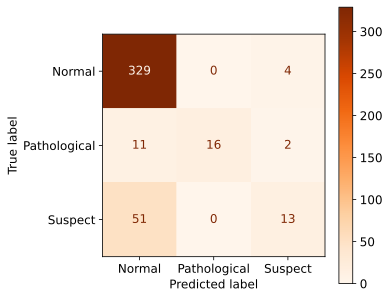

In [118]:
# Predict
ada_pred = ada.predict(test_X)
ada_proba = ada.predict_proba(test_X)

# Evaluate
# Now generate confusion matrix
cm = confusion_matrix(test_y, ada_pred, labels = ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ada.classes_)
ada_f1 = f1_score(test_y, ada.predict(test_X), average="macro")

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'Oranges', ax = ax);

# Saving confusion matrix plot
plt.savefig("ada_confusion_matrix.svg", bbox_inches = 'tight')

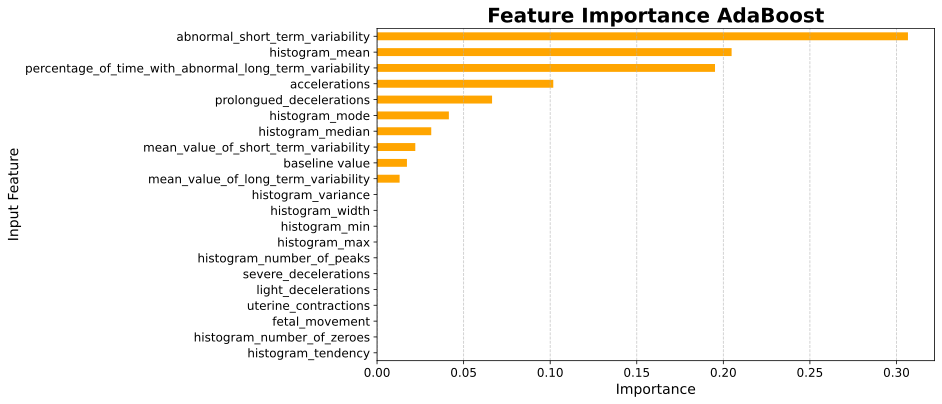

In [120]:
# Get feature importances
ada_imp = ada.feature_importances_
feature_names = train_X.columns

# Create a DataFrame for plotting
feat_importances_ada = pd.Series(ada_imp, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(10, 6))
feat_importances_ada.plot(kind='barh', color='orange')
plt.title("Feature Importance AdaBoost", fontsize=20, weight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Input Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Saving AdaBoost feature importance plot
plt.savefig("ada_feature_importance.svg", bbox_inches = 'tight')

In [121]:
# Classification report
ada_report = pd.DataFrame(classification_report(test_y, ada_pred, output_dict = True))
ada_report.to_csv("ada_classification_report.csv")

## **Train and Evaluate Soft Vote classifier**

In [122]:
# Define soft vote classifier
voting_soft = VotingClassifier(estimators=[("rf", rf), ("dt", dt), ("ada", ada)], voting="soft")

In [123]:
# Fit the model
start = time.time()            # Start Time
voting_soft.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.4474050998687744s


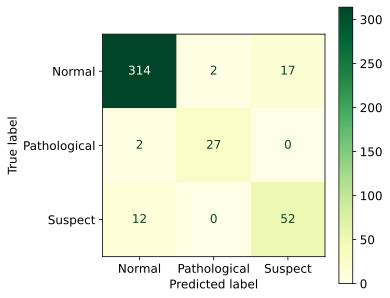

In [124]:
# Predict
vote_pred = voting_soft.predict(test_X)
vote_proba = voting_soft.predict_proba(test_X)

# Evaluate
# Now generate confusion matrix
cm = confusion_matrix(test_y, vote_pred, labels = voting_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = voting_soft.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'YlGn', ax = ax);

# Saving confusion matrix plot
plt.savefig("vote_confusion_matrix.svg", bbox_inches = 'tight')

'AI Disclosure Template\nTool: ChatGPT-5\nPupose: Implement weighted feature importance calculation and plotting for Soft Voting Classifier.'

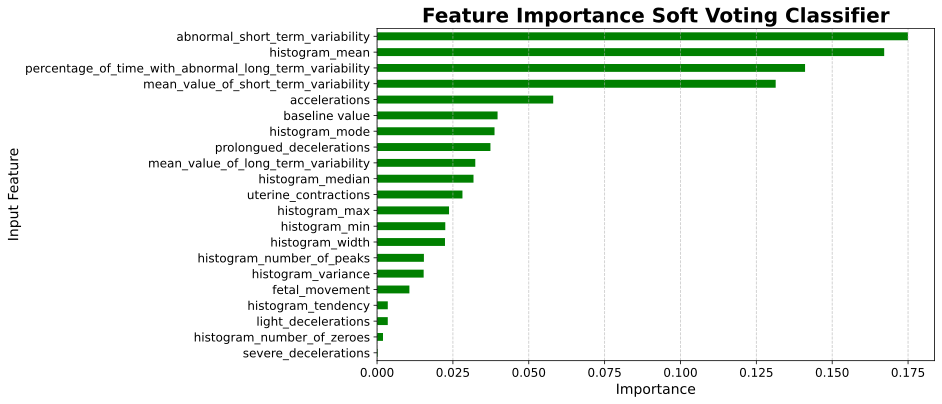

In [125]:
# Get feature importances
weights_raw = np.array([rf_f1, dt_f1, ada_f1])
weights = weights_raw / weights_raw.sum()
imp_matrix = np.vstack([rf_imp, dt_imp, ada_imp]).T
weighted_importance = imp_matrix @ weights  # matrix multiply with normalized weights
feature_names = train_X.columns

# Create a DataFrame for plotting
feat_importances_vote = pd.Series(weighted_importance, index=feature_names).sort_values()

# Plot
plt.figure(figsize=(10, 6))
feat_importances_vote.plot(kind='barh', color='green')
plt.title("Feature Importance Soft Voting Classifier", fontsize=20, weight='bold')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Input Feature", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Saving vote importance plot
plt.savefig("vote_feature_importance.svg", bbox_inches = 'tight')

"""AI Disclosure Template
Tool: ChatGPT-5
Pupose: Implement weighted feature importance calculation and plotting for Soft Voting Classifier."""

In [126]:
# Classification report
vote_report = pd.DataFrame(classification_report(test_y, vote_pred, output_dict = True))
vote_report.to_csv("vote_classification_report.csv")

### Save Model

In [127]:
# Bundle models into dicitonary for smoother saving
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "AdaBoost": ada,
    "Soft Voting": voting_soft
}

# Save to one pickle file
with open("fetal_health_models.pickle", "wb") as f:
    pickle.dump(models, f)
